In [1]:
import json
%matplotlib inline
import matplotlib as mpl
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
mpl.rcParams['figure.figsize'] = (20, 15)

In [4]:
main_file_location = "/home/valerio/workspace/caltech/genedesc_generator/generated_descriptions_slim/"
files_to_load = ["zfin_with_stats.json", "wb_with_stats.json", "fb_with_stats.json", "sgd_with_stats.json", 
                 "rgd_with_stats.json", "mgi_with_stats.json"]

## Stats for all Alliance organisms

Stats for: zfin_with_stats
total number of genes: 37375
num genes with non empty go sentence: 20062
average number of terms before trimming 6.11
average number of terms after trimming 3.56
average number of Function terms before trimming 2.05
average number of Function terms after trimming 1.09
average number of Process terms before trimming 2.41
average number of Process terms after trimming 1.33
average number of Component terms before trimming 1.64
average number of Component terms after trimming 1.14
maximum number of terms before trimming 79
worst case before trimming: mib1
maximum number of terms after trimming 17

previous case after trimming with description:
mib1: Exhibits protein homodimerization activity and ubiquitin-protein transferase activity; is involved in cell differentiation, anatomical structure development, cellular protein modification process, biological_process, pigmentation, anatomical structure formation involved in morphogenesis, signal transduction, and vesi

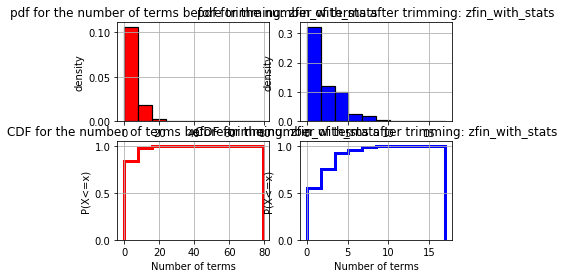

Stats for: wb_with_stats
total number of genes: 47882
num genes with non empty go sentence: 14936
average number of terms before trimming 6.56
average number of terms after trimming 3.53
average number of Function terms before trimming 1.63
average number of Function terms after trimming 0.84
average number of Process terms before trimming 3.13
average number of Process terms after trimming 1.46
average number of Component terms before trimming 1.80
average number of Component terms after trimming 1.24
maximum number of terms before trimming 57
worst case before trimming: daf-2
maximum number of terms after trimming 15

previous case after trimming with description:


daf-2: Exhibits sh2 domain binding, ptb domain binding, and protein kinase binding; is involved in reproduction, biological_process, and anatomical structure development; localizes to the cytoplasmic vesicle, cilium, cytoplasm, and cellular_component.


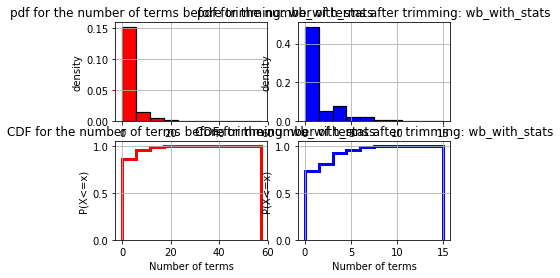

Stats for: fb_with_stats
total number of genes: 30743
num genes with non empty go sentence: 12439
average number of terms before trimming 5.82
average number of terms after trimming 3.73
average number of Function terms before trimming 1.38
average number of Function terms after trimming 0.96
average number of Process terms before trimming 3.05
average number of Process terms after trimming 1.72
average number of Component terms before trimming 1.38
average number of Component terms after trimming 1.05
maximum number of terms before trimming 100
worst case before trimming: N
maximum number of terms after trimming 24

previous case after trimming with description:
N: Exhibits chromatin binding; is involved in nervous system process, cell differentiation, immune system process, response to stress, mitotic cell cycle, cell adhesion, homeostatic process, anatomical structure development, cell morphogenesis, biological_process, cell motility, cell-cell signaling, anatomical structure format

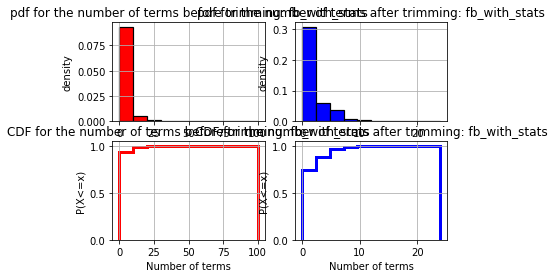

Stats for: sgd_with_stats
total number of genes: 7470
num genes with non empty go sentence: 6079
average number of terms before trimming 10.58
average number of terms after trimming 4.80
average number of Function terms before trimming 2.84
average number of Function terms after trimming 1.10
average number of Process terms before trimming 4.15
average number of Process terms after trimming 1.80
average number of Component terms before trimming 3.59
average number of Component terms after trimming 1.89
maximum number of terms before trimming 62
worst case before trimming: CDC28
maximum number of terms after trimming 20

previous case after trimming with description:
CDC28: Exhibits histone binding, cyclin-dependent protein serine/threonine kinase activity, and rna polymerase ii core binding; is involved in mrna processing, cellular protein modification process, cellular component assembly, biological_process, chromosome organization, dna metabolic process, and vesicle-mediated transpor

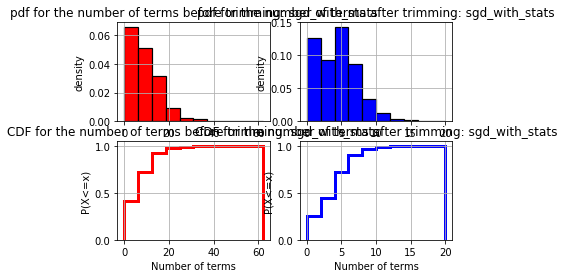

Stats for: rgd_with_stats
total number of genes: 41290
num genes with non empty go sentence: 19189
average number of terms before trimming 12.93
average number of terms after trimming 5.45
average number of Function terms before trimming 2.70
average number of Function terms after trimming 1.42
average number of Process terms before trimming 6.58
average number of Process terms after trimming 2.07
average number of Component terms before trimming 3.64
average number of Component terms after trimming 1.96
maximum number of terms before trimming 256


worst case before trimming: Ctnnb1
maximum number of terms after trimming 28

previous case after trimming with description:
Ctnnb1: Exhibits enzyme binding and molecular_function; is involved in cell differentiation, cell adhesion, anatomical structure development, biological_process, cell proliferation, and protein-containing complex assembly; localizes to the nucleus, protein-containing complex, cytoplasm, cellular_component, cytosol, and plasma membrane.


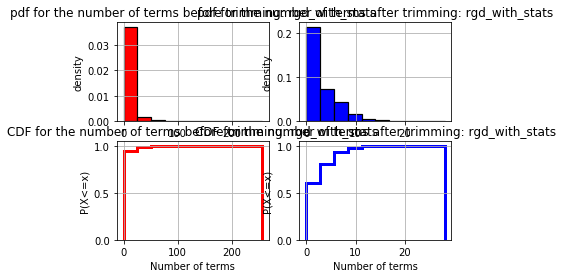

Stats for: mgi_with_stats
total number of genes: 69979
num genes with non empty go sentence: 19823
average number of terms before trimming 13.99
average number of terms after trimming 5.20
average number of Function terms before trimming 3.30
average number of Function terms after trimming 1.31
average number of Process terms before trimming 6.55
average number of Process terms after trimming 2.13
average number of Component terms before trimming 4.15


average number of Component terms after trimming 1.76
maximum number of terms before trimming 248
worst case before trimming: Ctnnb1
maximum number of terms after trimming 29

previous case after trimming with description:
Ctnnb1: Exhibits molecular_function, enzyme binding, transcription factor binding, transcription factor activity, protein binding, dna binding transcription factor activity, and dna binding; is involved in cell differentiation, immune system process, cell adhesion, homeostatic process, developmental maturation, cell morphogenesis, embryo development, biological_process, cell motility, cell junction organization, cell-cell signaling, anatomical structure formation involved in morphogenesis, signal transduction, vesicle-mediated transport, and cell proliferation; localizes to the nucleus, protein-containing complex, cytoplasm, microtubule organizing center, cellular_component, cytosol, and plasma membrane.


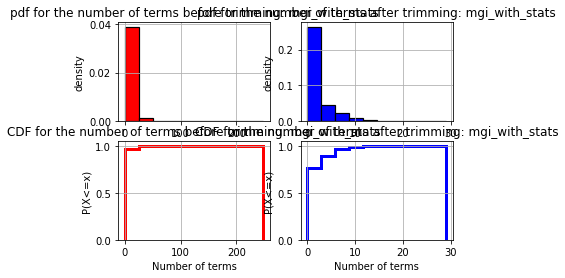

In [5]:
for file_to_load in files_to_load:
    json_str = json.load(open(main_file_location + file_to_load))
    organism = file_to_load.replace(".json", "")
    print("Stats for:", organism)
    print("total number of genes:", len(json_str["data"]))
    print("num genes with non empty go sentence:", 
          json_str["general_stats"]["num_genes_with_go_sentence"])
    print("average number of terms before trimming", 
          "{0:.2f}".format(json_str["general_stats"]["average_num_go_terms_if_desc_notrim_nogroup_priority_nomerge"]))
    print("average number of terms after trimming", 
          "{0:.2f}".format(json_str["general_stats"]["average_num_go_terms_if_desc_trim_group_priority_merge"]))
    max_num_terms_notrim = max([sum(gene_desc["stats"]["num_terms_notrim_nogroup_priority_nomerge"].values()) for 
                                gene_desc in json_str["data"]])
    print("average number of Function terms before trimming", 
          "{0:.2f}".format(np.average([gene_data["stats"]["num_terms_notrim_nogroup_priority_nomerge"]["F"] if "F" in 
                          gene_data["stats"]["num_terms_notrim_nogroup_priority_nomerge"] else 0 for 
                          gene_data in json_str["data"] if gene_data["description"] != "No description available"])))
    print("average number of Function terms after trimming", 
          "{0:.2f}".format(np.average([gene_data["stats"]["num_terms_trim_group_priority_merge"]["F"] if "F" in 
                          gene_data["stats"]["num_terms_trim_group_priority_merge"] else 0 for 
                          gene_data in json_str["data"] if gene_data["description"] != "No description available"])))
    print("average number of Process terms before trimming", 
          "{0:.2f}".format(np.average([gene_data["stats"]["num_terms_notrim_nogroup_priority_nomerge"]["P"] if "P" in 
                          gene_data["stats"]["num_terms_notrim_nogroup_priority_nomerge"] else 0 for 
                          gene_data in json_str["data"] if gene_data["description"] != "No description available"])))
    print("average number of Process terms after trimming", 
          "{0:.2f}".format(np.average([gene_data["stats"]["num_terms_trim_group_priority_merge"]["P"] if "P" in 
                          gene_data["stats"]["num_terms_trim_group_priority_merge"] else 0 for 
                          gene_data in json_str["data"] if gene_data["description"] != "No description available"])))
    print("average number of Component terms before trimming", 
          "{0:.2f}".format(np.average([gene_data["stats"]["num_terms_notrim_nogroup_priority_nomerge"]["C"] if "C" in 
                          gene_data["stats"]["num_terms_notrim_nogroup_priority_nomerge"] else 0 for 
                          gene_data in json_str["data"] if gene_data["description"] != "No description available"])))
    print("average number of Component terms after trimming", 
          "{0:.2f}".format(np.average([gene_data["stats"]["num_terms_trim_group_priority_merge"]["C"] if "C" in 
                          gene_data["stats"]["num_terms_trim_group_priority_merge"] else 0 for 
                          gene_data in json_str["data"] if gene_data["description"] != "No description available"])))
    print("maximum number of terms before trimming", max_num_terms_notrim)
    print("worst case before trimming:", 
          [gene_desc["gene_name"] for gene_desc in json_str["data"] if 
           sum(gene_desc["stats"]["num_terms_notrim_nogroup_priority_nomerge"].values()) == 
           max_num_terms_notrim][0])
    max_num_terms_trim = max([sum(gene_desc["stats"]["num_terms_trim_group_priority_merge"].values()) for 
                              gene_desc in json_str["data"]])
    print("maximum number of terms after trimming", max_num_terms_trim)
    print()
    print("previous case after trimming with description:") 
    print([gene_desc["gene_name"] + ": " + gene_desc["description"] for gene_desc in 
           json_str["data"] if 
           sum(gene_desc["stats"]["num_terms_notrim_nogroup_priority_nomerge"].values()) == 
           max_num_terms_notrim][0])
    organism = file_to_load.replace(".json", "")
    plt.subplot(2, 2, 1)
    plt.grid(True)
    plt.hist([sum(gene_desc["stats"]["num_terms_notrim_nogroup_priority_nomerge"].values()) for 
              gene_desc in json_str["data"]], normed=1, cumulative=False, linestyle='solid', color='red',  
             edgecolor='black', linewidth=1.2)
    plt.xlabel('Number of terms')
    plt.ylabel('density')
    plt.title('pdf for the number of terms before trimming: ' + organism)
    
    plt.subplot(2, 2, 2)
    plt.hist([sum(gene_desc["stats"]["num_terms_trim_group_priority_merge"].values()) for 
              gene_desc in json_str["data"]], normed=1, cumulative=False, color='blue', edgecolor='black', 
             linewidth=1.2)
    plt.xlabel('Number of terms')
    plt.ylabel('density')
    plt.title('pdf for the number of terms after trimming: ' + organism)
    plt.grid(True)
    
    plt.subplot(2, 2, 3)
    plt.hist([sum(gene_desc["stats"]["num_terms_notrim_nogroup_priority_nomerge"].values()) for 
              gene_desc in json_str["data"]], normed=1, cumulative=True, histtype='step', edgecolor='red', 
             linewidth=3)
    plt.xlabel('Number of terms')
    plt.ylabel('P(X<=x)')
    plt.title('CDF for the number of terms before trimming: ' + organism)
    plt.grid(True)
    
    plt.subplot(2, 2, 4)
    plt.hist([sum(gene_desc["stats"]["num_terms_trim_group_priority_merge"].values()) for 
              gene_desc in json_str["data"]], normed=1, cumulative=True, histtype='step', edgecolor='blue', 
             linewidth=3)
    plt.xlabel('Number of terms')
    plt.ylabel('P(X<=x)')
    plt.title('CDF for the number of terms after trimming: ' + organism)
    plt.grid(True)
    plt.show()
    print()
    print()
